# **Cleaning House Data**  


- ## Pre-processing steps for merging datasets

 1. Load the flats dataset 


 2. Clean the flats dataset 


3. **Load the houses dataset**


4. **Clean the houses dataset**


 5. Merge the cleaned datasets


 6. Perform a second round of cleaning on the merged dataset


 7. Save the cleaned dataset
---
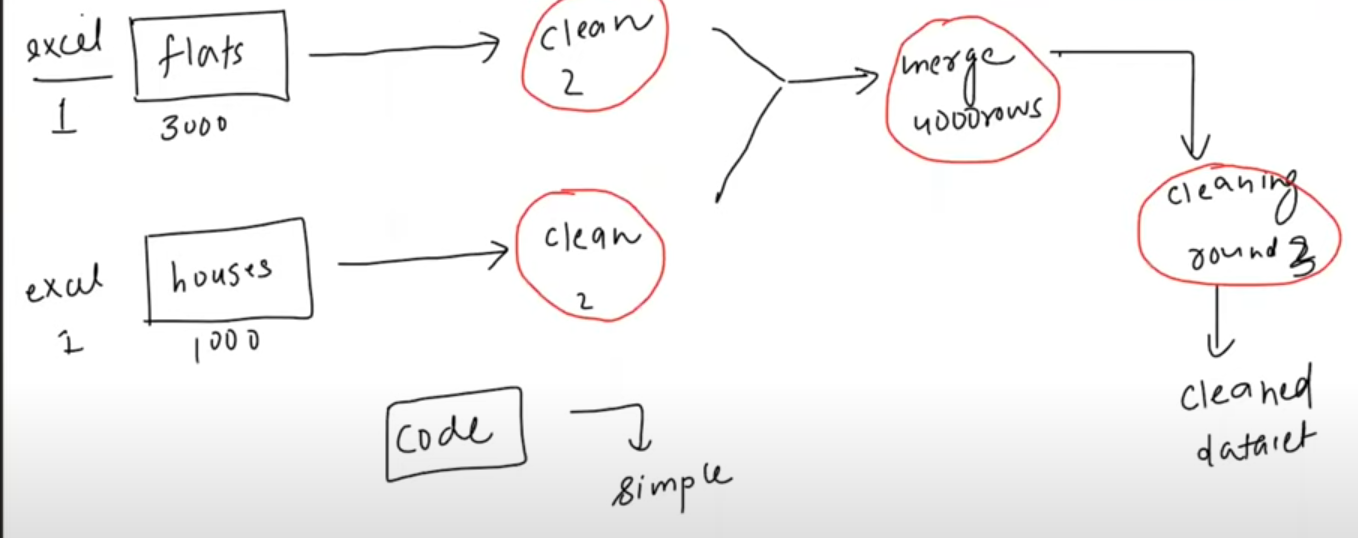

---





In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

---
## Load data

In [2]:
input_file = '../data/scrap-data/houses.csv'
outut_file = '../data/clean-data/house_cleaned.csv'
df = pd.read_csv(input_file)
df.sample(5)

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
685,9 Bedroom House for sale in DLF Phase 2,https://www.99acres.com/9-bhk-bedroom-independ...,NaN,7.3 Crore,"₹ 1,560/sq.ft.",(180 sq.m.) Plot Area,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9 Bedrooms,9 Bathrooms,2 Balconies,"Servant Room,Store Room","Dlf Phase 2, DLF Phase 2, Gurgaon, Haryana",3 Floors,North-West,1 to 5 Year Old,"['Vodafone belvedere towers metro station', 'D...","Floorwise builtup house with basement, stilt w...","['12 Fan', '1 Exhaust Fan', '28 Light', '1 Mod...","['Feng Shui / Vaastu Compliant', 'High Ceiling...","['Environment5 out of 5', 'Lifestyle5 out of 5...",Q69161092
548,2 Bedroom House for sale in Dharam Colony Block E,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Price on Request,NaN,(84 sq.m.) Built-up Area,Built Up area: 900 (83.61 sq.m.),2 Bedrooms,1 Bathroom,No Balcony,NaN,"Dharam Colony Block E, Gurgaon, Haryana",1 Floors,NaN,undefined,"['Palam triangle', 'Palam Vihar Vyapar kendra'...","1 bath, unfurnished, ground floor (Of 1), at d...",NaN,NaN,NaN,T65452900
728,12 Bedroom House for sale in Sector 31 Gurgaon,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,9.25 Crore,"₹ 39,530/sq.ft.",(222 sq.m.) Plot Area,Plot area 265(221.57 sq.m.)Built Up area: 262 ...,12 Bedrooms,12 Bathrooms,3+ Balconies,"Pooja Room,Servant Room,Others","Near Huda Market, Sector 31 Gurgaon, Gurgaon, ...",4 Floors,North-East,0 to 1 Year Old,"['Hanuman Mandir', 'Icici bank ATM', 'State ba...","Stilt plus 4 brand new building in sector 31 ,...","['12 Wardrobe', '1 Exhaust Fan', '12 Geyser', ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle5 out of 5...",Z69405606
84,3 Bedroom House for sale in Sector 109 Gurgaon,https://www.99acres.com/3-bhk-bedroom-independ...,International City by Sobha Phase 1,NaN,"₹ 11,100/sq.ft.",(293 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka sector 21 metro station', 'Pacific D2...","With just 6 villas per acre, international cit...",NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5...",C69934808
132,5 Bedroom House for sale in Sector 109 Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,International City by SOBHA Phase 2,7 Crore,"₹ 12,963/sq.ft.",(502 sq.m.) Plot Area,Plot area 600(501.68 sq.m.),5 Bedrooms,6 Bathrooms,2 Balconies,Servant Room,"141, Sector 109 Gurgaon, Gurgaon, Haryana",2 Floors,West,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Pacific D2...","Peaceful, private, premium, gated, duplex vill...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Lifestyle4 out of 5...",G69900346


In [3]:
# shape
df.shape

(1044, 21)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   link             1044 non-null   object
 2   society          453 non-null    object
 3   price            968 non-null    object
 4   rate             1005 non-null   object
 5   area             1044 non-null   object
 6   areaWithType     987 non-null    object
 7   bedRoom          987 non-null    object
 8   bathroom         987 non-null    object
 9   balcony          987 non-null    object
 10  additionalRoom   589 non-null    object
 11  address          1031 non-null   object
 12  noOfFloor        967 non-null    object
 13  facing           674 non-null    object
 14  agePossession    987 non-null    object
 15  nearbyLocations  913 non-null    object
 16  description      1036 non-null   object
 17  furnishDetails   743 non-null    

In [5]:
# check for duplicates
df.duplicated().sum()

np.int64(13)

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1031, 21)

In [8]:
# check for missing values
df.isnull().sum()

property_name        0
link                 0
society            586
price               76
rate                39
area                 0
areaWithType        57
bedRoom             57
bathroom            57
balcony             57
additionalRoom     453
address             13
noOfFloor           76
facing             369
agePossession       57
nearbyLocations    131
description          8
furnishDetails     299
features           369
rating             137
property_id          8
dtype: int64

In [9]:
# Columns to drop -> property_name, link, property_id
df.drop(columns=['link','property_id'], inplace=True)
df.head()

,property_name,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [10]:
# rename columns
df.rename(columns={'rate':'price_per_sqft'},inplace=True)
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## society

In [11]:
df['society'].value_counts()

society
Emaar MGF Marbella                                   26
International City by SOBHA Phase 2                  26
Vipul Tatvam Villa                                   24
International City by Sobha Phase 1                  23
Unitech Uniworld Resorts                             13
Unitech Espace                                       11
DLF City Plots Phase 2                               11
DLF City Plots                                       11
Eldeco Mansionz                                       9
Bptp Visionnaire                                      8
Not Applicable                                        7
Uppal Southend4.0 ★                                   7
Ansals Palam Vihar                                    6
Sushant Lok 1 Builder Floors                          6
Experion Windchants3.8 ★                              5
DLF City Phase 1                                      5
Ansal Sushant Lok Plots4.1 ★                          4
Unitech Aspen Greens                    

In [12]:
df['society'].value_counts().shape

(185,)

In [13]:
import re
df['society'] = df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [14]:
df['society'].value_counts().shape

(183,)

In [15]:
df['society'] = df['society'].str.replace('nan','independent')

In [16]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [17]:
# price
df['price'].value_counts()

price
3.5 Crore           19
5.5 Crore           17
6.5 Crore           16
6 Crore             14
4.5 Crore           13
5 Crore             13
8 Crore             13
50 Lac              13
75 Lac              13
70 Lac              13
7 Crore             12
8.5 Crore           12
85 Lac              12
1.5 Crore           11
4 Crore             11
90 Lac              10
Price on Request    10
2.25 Crore          10
45 Lac              10
60 Lac              10
10 Crore            10
2.5 Crore           10
9 Crore             10
12 Crore             9
2 Crore              9
80 Lac               9
9.5 Crore            9
1.1 Crore            9
1.7 Crore            9
1 Crore              8
1.6 Crore            8
11 Crore             8
6.75 Crore           8
4.6 Crore            8
3.75 Crore           7
1.2 Crore            7
55 Lac               7
40 Lac               7
1.3 Crore            7
12.5 Crore           7
95 Lac               7
65 Lac               7
1.35 Crore           7
2.1 C

In [18]:
df = df[df['price'] != 'Price on Request']

In [19]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [20]:
def treat_price(x):
    if type(x) == float:
        return x
    else:
        if x[1] == 'Lac':
            return round(float(x[0])/100,2)
        else:
            return round(float(x[0]),2)

In [21]:
df['price'] = df['price'].str.split(' ').apply(treat_price)

In [22]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## price_per_sqft

In [23]:
df['price_per_sqft'].value_counts()

price_per_sqft
₹ 22,222/sq.ft.     14
₹ 33,333/sq.ft.     11
₹ 11,111/sq.ft.     11
₹ 10,000/sq.ft.     10
₹ 13,333/sq.ft.      6
₹ 26,667/sq.ft.      6
₹ 37,037/sq.ft.      6
₹ 26,235/sq.ft.      6
₹ 30,556/sq.ft.      6
₹ 31,481/sq.ft.      6
₹ 11,100/sq.ft.      5
₹ 23,148/sq.ft.      5
₹ 23,333/sq.ft.      5
₹ 8,000/sq.ft.       5
₹ 5,000/sq.ft.       5
₹ 8,889/sq.ft.       5
₹ 9,444/sq.ft.       5
₹ 34,722/sq.ft.      4
₹ 21,605/sq.ft.      4
₹ 9,722/sq.ft.       4
₹ 18,889/sq.ft.      4
₹ 32,407/sq.ft.      4
₹ 35,000/sq.ft.      4
₹ 24,691/sq.ft.      4
₹ 25,000/sq.ft.      4
₹ 27,778/sq.ft.      4
₹ 6,944/sq.ft.       4
₹ 20,000/sq.ft.      3
₹ 16,058/sq.ft.      3
₹ 11,250/sq.ft.      3
₹ 14,815/sq.ft.      3
₹ 33,951/sq.ft.      3
₹ 5,555/sq.ft.       3
₹ 12,222/sq.ft.      3
₹ 60,000/sq.ft.      3
₹ 10,556/sq.ft.      3
₹ 13,889/sq.ft.      3
₹ 15,625/sq.ft.      3
₹ 8,235/sq.ft.       3
₹ 6,666/sq.ft.       3
₹ 29,880/sq.ft.      3
₹ 8,444/sq.ft.       3
₹ 36,111/sq.ft.    

In [24]:
df['price_per_sqft'] = df['price_per_sqft'].str.split('/').str.get(0).str.replace('₹','').str.replace(',','').str.strip().astype('float')

In [25]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## bedrooms

In [26]:
df['bedRoom'].value_counts()

bedRoom
4 Bedrooms     232
5 Bedrooms     194
3 Bedrooms     146
2 Bedrooms      88
6 Bedrooms      81
9 Bedrooms      45
1 Bedroom       38
8 Bedrooms      33
7 Bedrooms      31
12 Bedrooms     28
10 Bedrooms     21
16 Bedrooms     12
13 Bedrooms      4
11 Bedrooms      2
19 Bedrooms      2
18 Bedrooms      2
21 Bedrooms      1
20 Bedrooms      1
36 Bedrooms      1
34 Bedrooms      1
14 Bedrooms      1
Name: count, dtype: int64

In [27]:
df[df['bedRoom'].isnull()]

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
62,5 Bedroom House for sale in Sector 109 Gurgaon,international city by sobha phase 2,NaN,13622.0,(467-681 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Pacific D2...",International city by sobha phase 2 in sector-...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
63,4 Bedroom House for sale in Sector 109 Gurgaon,international city by sobha phase 2,NaN,13909.0,(384-392 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Pacific D2...",International city by sobha phase 2 in sector-...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
66,5 Bedroom House for sale in Sector 66 Gurgaon,emaar mgf marbella,NaN,16058.0,(606-754 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 66 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","Emaar mgf marbella in sector-66, gurgaon by em...",NaN,NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."
67,4 Bedroom House for sale in Sector 66 Gurgaon,emaar mgf marbella,NaN,16058.0,(521 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 66 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","Emaar mgf marbella in sector-66, gurgaon by em...",NaN,NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."
68,5 Bedroom House for sale in Sector 109 Gurgaon,international city by sobha phase 2,NaN,13623.0,(467-681 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Pacific D2...",International city by sobha phase 2 in sector-...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
69,4 Bedroom House for sale in Sector 109 Gurgaon,international city by sobha phase 2,NaN,13910.0,(294-418 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Pacific D2...",International city by sobha phase 2 in sector-...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
70,3 Bedroom House for sale in Sector 109 Gurgaon,international city by sobha phase 2,NaN,13910.0,(293 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 109 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Pacific D2...",International city by sobha phase 2 in sector-...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
71,4 Bedroom House for sale in Sector 112 Gurgaon,experion windchants,NaN,12027.0,(590-687 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 112 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Ansal Plaza', 'Dwaraka Expressway', 'First S...","Experion windchants in sector 112, gurgaon by ...",NaN,NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
72,4 Bedroom House for sale in Sector 66 Gurgaon,emaar mgf marbella,NaN,15700.0,(521 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 66 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","Emaar mgf marbella in sector-66, gurgaon by em...",NaN,NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."
73,5 Bedroom House for sale in Sector 66 Gurgaon,emaar mgf marbella,NaN,19708.0,(606 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 66 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","Emaar mgf marbella in sector-66, gurgaon by em...",NaN,NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."


In [28]:
df = df[~df['bedRoom'].isnull()]

In [29]:
df.shape

(964, 19)

In [30]:
df['bedRoom'] = df['bedRoom'].str.split(' ').str.get(0).astype('int')

In [31]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## bathroom

In [32]:
# bathroom
df['bathroom'].value_counts()

bathroom
4 Bathrooms     228
3 Bathrooms     165
5 Bathrooms     137
2 Bathrooms     114
6 Bathrooms      82
1 Bathroom       65
9 Bathrooms      42
7 Bathrooms      39
8 Bathrooms      28
12 Bathrooms     22
10 Bathrooms     11
16 Bathrooms      8
13 Bathrooms      4
18 Bathrooms      4
11 Bathrooms      4
17 Bathrooms      3
20 Bathrooms      3
14 Bathrooms      2
21 Bathrooms      1
34 Bathrooms      1
36 Bathrooms      1
Name: count, dtype: int64

In [33]:
df['bathroom'].isnull().sum()

np.int64(0)

In [34]:
df['bathroom'] = df['bathroom'].str.split(' ').str.get(0).astype('int')

In [35]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## balcony

In [36]:
df['balcony'].value_counts()

balcony
3+ Balconies    365
2 Balconies     220
3 Balconies     159
No Balcony      115
1 Balcony       105
Name: count, dtype: int64

In [37]:
df['balcony'].isnull().sum()

np.int64(0)

In [38]:
df['balcony'] = df['balcony'].str.split(' ').str.get(0).str.replace('No','0')

In [39]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4,2,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3+,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## additionalRoom

In [40]:
df['additionalRoom'].value_counts()

additionalRoom
Servant Room                                     81
Pooja Room,Study Room,Servant Room,Store Room    60
Others                                           58
Pooja Room                                       38
Pooja Room,Study Room,Servant Room               33
Pooja Room,Study Room,Servant Room,Others        32
Store Room                                       31
Pooja Room,Servant Room                          24
Study Room                                       19
Study Room,Servant Room                          19
Servant Room,Store Room                          15
Pooja Room,Study Room                            11
Pooja Room,Others                                11
Pooja Room,Store Room                            11
Servant Room,Others                               8
Pooja Room,Store Room,Study Room,Servant Room     8
Servant Room,Pooja Room                           8
Pooja Room,Servant Room,Store Room                7
Servant Room,Pooja Room,Store Room               

In [41]:
df['additionalRoom'].fillna('not available',inplace=True)

/tmp/ipykernel_114828/1615843200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additionalRoom'].fillna('not available',inplace=True)


In [42]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [43]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## floorNum

In [44]:

df.rename(columns={'noOfFloor':'floorNum'},inplace=True)
df['floorNum'].value_counts()


floorNum
3 Floors     304
2 Floors     288
1 Floors     181
4 Floors     136
5 Floors       9
0 Floors       6
14 Floors      3
6 Floors       3
10 Floors      2
11 Floors      2
12 Floors      2
21 Floors      1
13 Floors      1
27 Floors      1
02 Floors      1
20 Floors      1
41 Floors      1
51 Floors      1
16 Floors      1
33 Floors      1
Name: count, dtype: int64

In [45]:
df['floorNum'].isnull().sum()

np.int64(19)

In [46]:
df['floorNum'] = df['floorNum'].str.split(' ').str.get(0)

In [47]:
df.head()

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,bptp visionnaire,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,independent,5.70,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,independent,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,independent,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,independent,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


---
## facing

In [48]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipykernel_114828/3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [49]:
df['area'] = round((df['price']*10000000)/df['price_per_sqft'])

In [50]:
df.insert(loc=1,column='property_type',value='house')

In [51]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2,NA,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [52]:
df.shape

(964, 20)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 1043
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    964 non-null    object 
 1   property_type    964 non-null    object 
 2   society          964 non-null    object 
 3   price            945 non-null    float64
 4   price_per_sqft   945 non-null    float64
 5   area             945 non-null    float64
 6   areaWithType     964 non-null    object 
 7   bedRoom          964 non-null    int64  
 8   bathroom         964 non-null    int64  
 9   balcony          964 non-null    object 
 10  additionalRoom   964 non-null    object 
 11  address          959 non-null    object 
 12  floorNum         945 non-null    object 
 13  facing           964 non-null    object 
 14  agePossession    964 non-null    object 
 15  nearbyLocations  848 non-null    object 
 16  description      964 non-null    object 
 17  furnishDetails   729

In [54]:
df.to_csv(outut_file,index=False)